In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.inspection import permutation_importance

In [ ]:
# Load the datasets
X_train = pd.read_csv('Preprocessed_X_train.csv')
X_test = pd.read_csv('Preprocessed_X_test.csv')
y_train = pd.read_csv('Preprocessed_y_train.csv')
y_train = y_train.iloc[:, 0]
y_test = pd.read_csv('Preprocessed_y_test.csv')
y_test = y_test.iloc[:, 0]

# Model 1: SVR on features

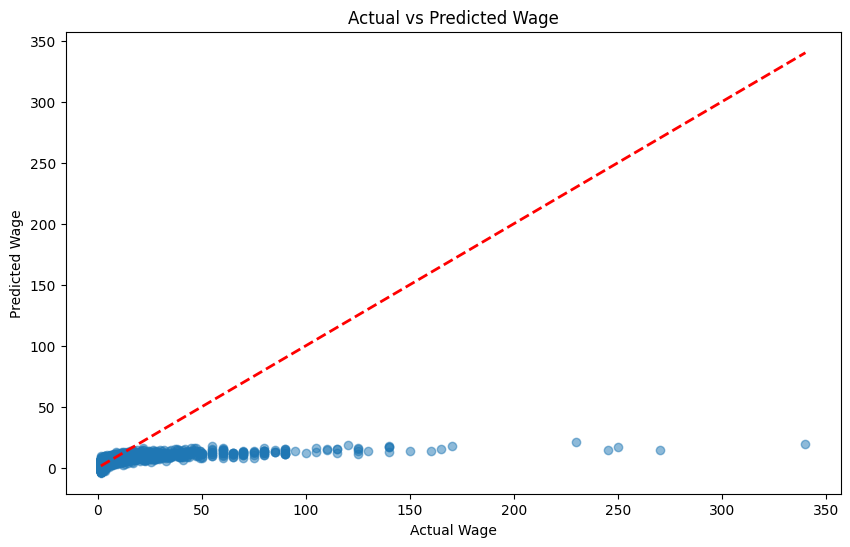

SVR - Mean Squared Error: 281.9234226088395
SVR - R² Score: 0.15640173140527458

Top 20 Features:
           Feature  Importance
0    overall_score    0.039406
1        Reactions    0.028163
2   position_score    0.021274
3        Composure    0.014726
4       Short Pass    0.014336
5          Heading    0.011989
6       mental_avg    0.008902
7     Ball Control    0.008328
8      Heading_new    0.007276
9   ball_skill_avg    0.007230
10     passing_avg    0.006948
11        Crossing    0.006764
12    Stand Tackle    0.006359
13       Dribbling    0.006170
14    Slide Tackle    0.005439
15   Interceptions    0.005409
16        pref_pos    0.004634
17          Vision    0.004044
18    Sprint Speed    0.003942
19       Finishing    0.003630


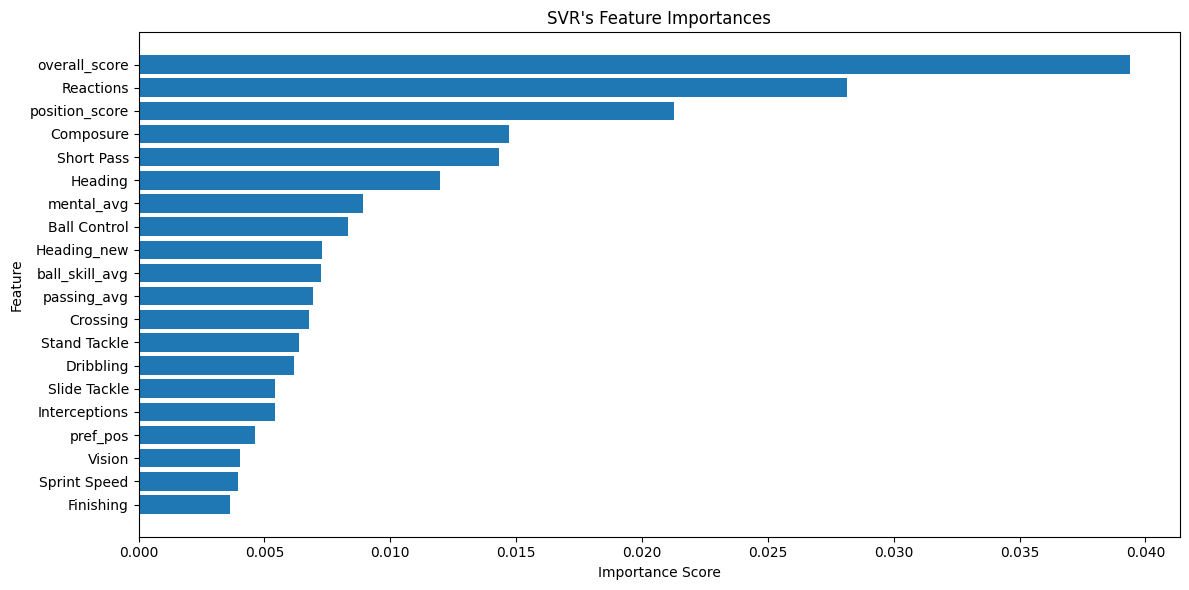

In [ ]:
# Train the SVR model
svr_model = SVR(kernel='rbf', C=100, epsilon=0.1)
svr_model.fit(X_train, y_train)

# Predict on test data
svr_y_pred = svr_model.predict(X_test)

# Visualization: Actual vs. Predicted Wage
plt.figure(figsize=(10, 6))
plt.scatter(y_test, svr_y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title("Actual vs Predicted Wage")
plt.xlabel("Actual Wage")
plt.ylabel("Predicted Wage")
plt.show()

# Calculate metrics
svr_mse = mean_squared_error(y_test, svr_y_pred)
svr_r2 = r2_score(y_test, svr_y_pred)

# Print performance metrics
print(f"SVR - Mean Squared Error: {svr_mse}")
print(f"SVR - R² Score: {svr_r2}")

# Visualize feature importance for the SVR model
result = permutation_importance(svr_model, X_test, y_test, n_repeats=1, random_state=42)
feature_list = list(zip(X_test.columns, result["importances_mean"]))
top_20_features = pd.DataFrame(sorted(feature_list, key=lambda x: x[1], reverse=True)[:20], columns=["Feature", "Importance"])

print("\nTop 20 Features:")
print(top_20_features)

# Plot feature importance
plt.figure(figsize=(12, 6))
plt.barh(top_20_features["Feature"], top_20_features["Importance"])
plt.title("SVR's Feature Importances")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Model 2: SVR on XGBoost's top 20 features

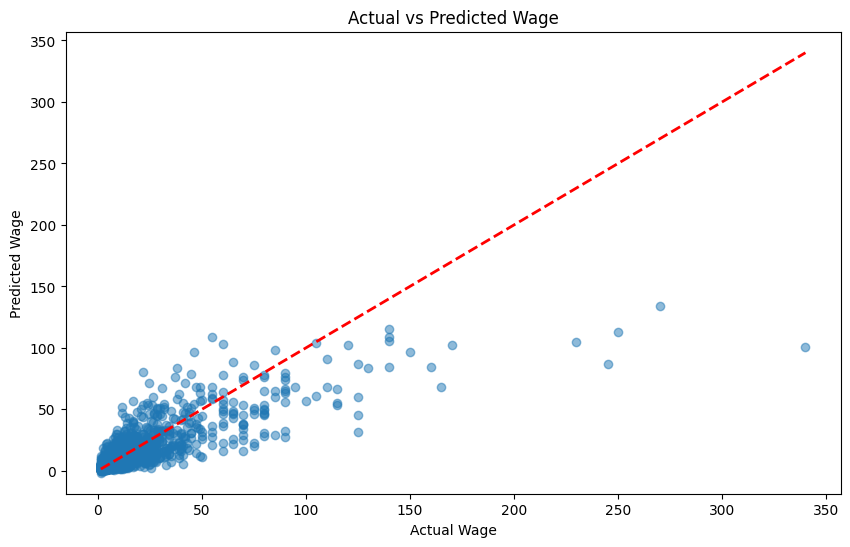

SVR on XGBoost's Top 20 Features - Mean Squared Error: 105.45675127950949
SVR on XGBoost's Top 20 Features - R² Score: 0.6844422078599246

Top 20 Features:
          Feature  Importance
0       Dribbling    0.199586
1   Att. Position    0.167872
2    Ball Control    0.166825
3       Reactions    0.143874
4    Stand Tackle    0.138085
5      Short Pass    0.128494
6    Slide Tackle    0.124660
7   Interceptions    0.099540
8        Crossing    0.082072
9       Composure    0.073896
10     Aggression    0.070554
11         Vision    0.062958
12        Jumping    0.058401
13   Sprint Speed    0.039211
14   Acceleration    0.035255
15      Long Pass    0.026637
16        Agility    0.024382
17       Strength    0.015427
18        Stamina    0.014940
19        Balance    0.014714


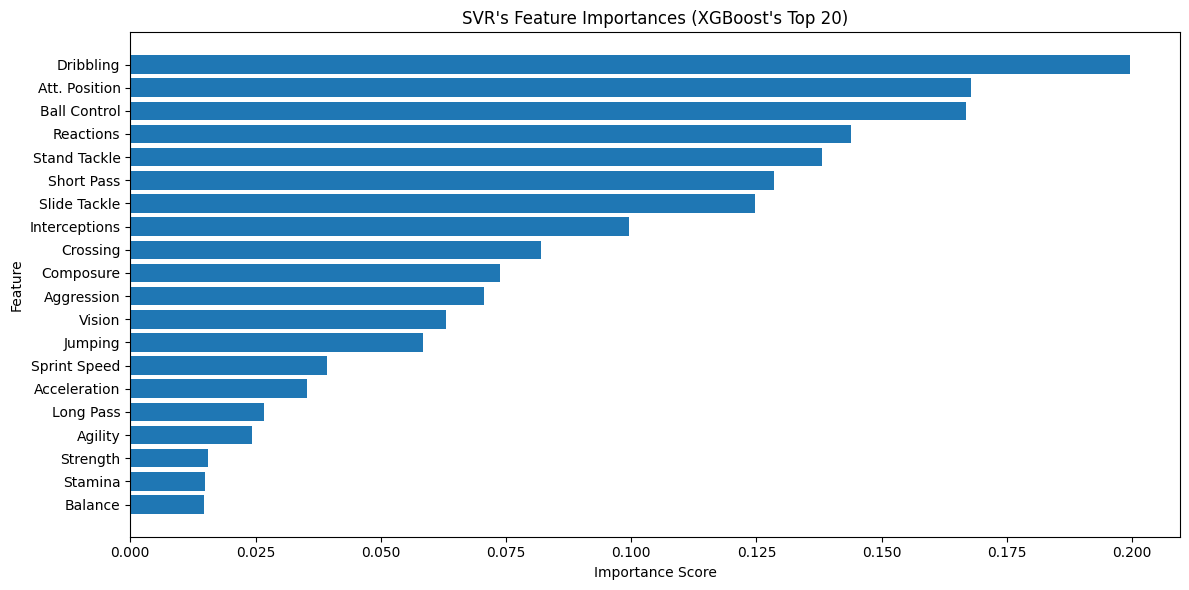

In [ ]:
# Subset data for XGBoost's top 20 features
XGBoost_features = ['Ball Control', 'Dribbling', 'Slide Tackle', 'Stand Tackle', 'Aggression',
                 'Reactions', 'Att. Position', 'Interceptions', 'Vision', 'Composure',
                 'Crossing', 'Short Pass', 'Long Pass', 'Acceleration', 'Stamina',
                 'Strength', 'Balance', 'Sprint Speed', 'Agility', 'Jumping']

X_XGBoost_train = X_train[XGBoost_features]
X_XGBoost_test = X_test[XGBoost_features]

# Train the SVR model
svr_XGBoost_model = SVR(kernel='rbf', C=100, epsilon=0.1)
svr_XGBoost_model.fit(X_XGBoost_train, y_train)

# Predict on test data
svr_XGBoost_y_pred = svr_XGBoost_model.predict(X_XGBoost_test)

# Visualization: Actual vs. Predicted Wage
plt.figure(figsize=(10, 6))
plt.scatter(y_test, svr_XGBoost_y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title("Actual vs Predicted Wage")
plt.xlabel("Actual Wage")
plt.ylabel("Predicted Wage")
plt.show()

# Calculate metrics
svr_XGBoost_mse = mean_squared_error(y_test, svr_XGBoost_y_pred)
svr_XGBoost_r2 = r2_score(y_test, svr_XGBoost_y_pred)

# Print performance metrics
print(f"SVR on XGBoost's Top 20 Features - Mean Squared Error: {svr_XGBoost_mse}")
print(f"SVR on XGBoost's Top 20 Features - R² Score: {svr_XGBoost_r2}")

# Visualize feature importance for XGBoost's top 20 features
result = permutation_importance(svr_XGBoost_model, X_XGBoost_test, y_test, n_repeats=1, random_state=42)
feature_list = list(zip(X_XGBoost_test.columns, result["importances_mean"]))
top_20_features = pd.DataFrame(sorted(feature_list, key=lambda x: x[1], reverse=True)[:20], columns=["Feature", "Importance"])

print("\nTop 20 Features:")
print(top_20_features)

# Plot feature importance
plt.figure(figsize=(12, 6))
plt.barh(top_20_features["Feature"], top_20_features["Importance"])
plt.title("SVR's Feature Importances (XGBoost's Top 20)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Model 3: SVR on Preprocessed's top 20 features

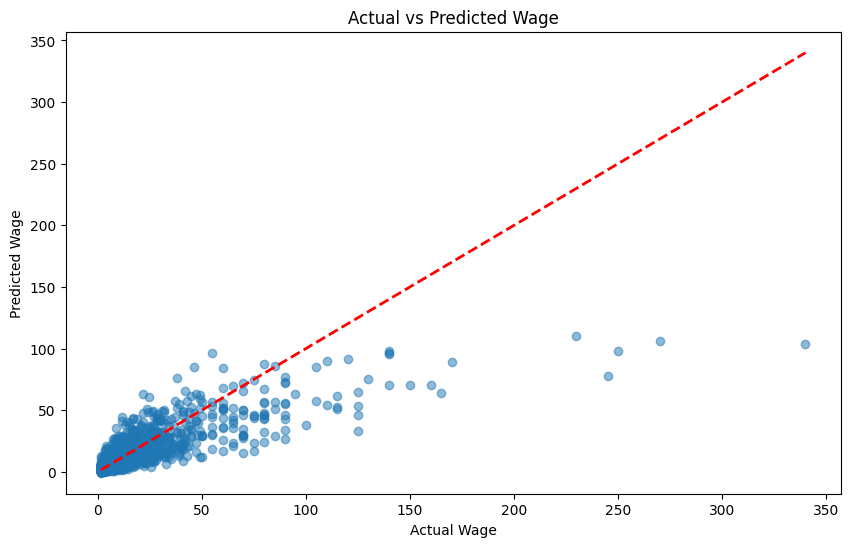

SVR on Preprocessed's Top 20 Features - Mean Squared Error: 110.3568524171874
SVR on Preprocessed's Top 20 Features - R² Score: 0.6697796558894928

Top 20 Features:
           Feature  Importance
0    overall_score    0.312667
1        Reactions    0.088792
2        Dribbling    0.086263
3     Ball Control    0.078274
4       Short Pass    0.073838
5    Att. Position    0.063429
6        Composure    0.057451
7     Stand Tackle    0.050443
8         Crossing    0.045742
9    Interceptions    0.037138
10  position_score    0.035362
11    Slide Tackle    0.034820
12      Aggression    0.032140
13         Jumping    0.027225
14    Sprint Speed    0.019413
15          Vision    0.019318
16       Long Pass    0.014543
17    Acceleration    0.009801
18          height    0.008464
19         Agility    0.006318


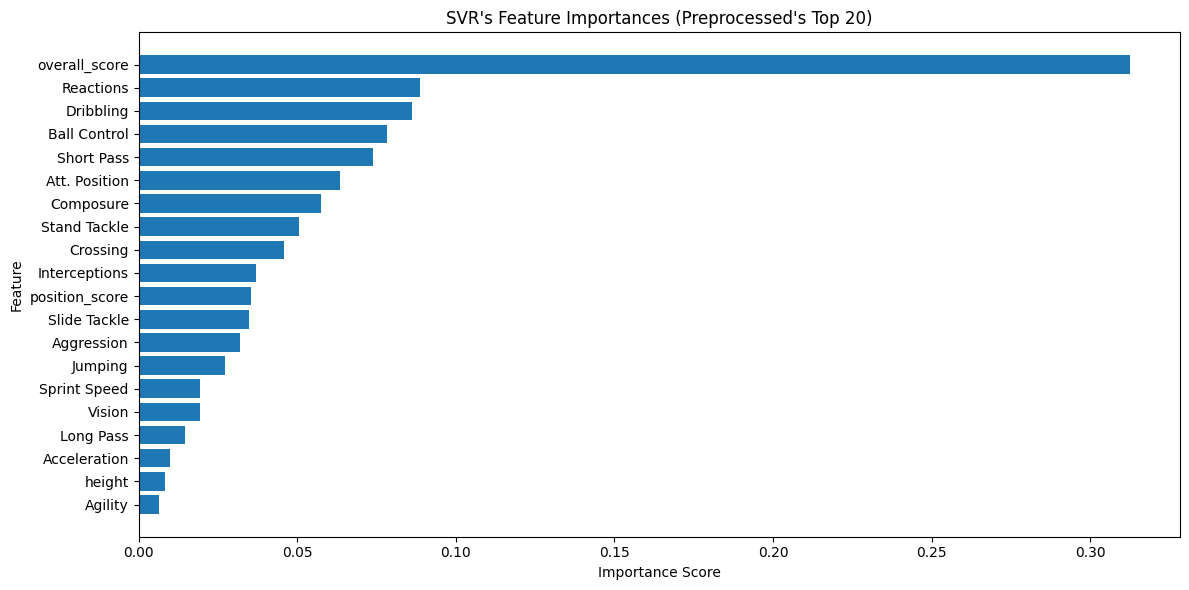

In [ ]:
# Subset data for Preprocessed's top 20 features
Preprocessed_features = [
    'overall_score', 'position_score', 'height', 'weight', 'age', 'Ball Control',
    'Dribbling', 'Slide Tackle', 'Stand Tackle', 'Aggression', 'Reactions',
    'Att. Position', 'Interceptions', 'Vision', 'Composure', 'Crossing',
    'Short Pass', 'Long Pass', 'Acceleration', 'Stamina', 'Strength', 'Balance',
    'Sprint Speed', 'Agility', 'Jumping'
]

X_Preprocessed_train = X_train[Preprocessed_features]
X_Preprocessed_test = X_test[Preprocessed_features]

# Train the SVR model
svr_Preprocessed_model = SVR(kernel='rbf', C=100, epsilon=0.1)
svr_Preprocessed_model.fit(X_Preprocessed_train, y_train)

# Predict on test data
svr_Preprocessed_y_pred = svr_Preprocessed_model.predict(X_Preprocessed_test)

# Visualization: Actual vs. Predicted Wage
plt.figure(figsize=(10, 6))
plt.scatter(y_test, svr_Preprocessed_y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title("Actual vs Predicted Wage")
plt.xlabel("Actual Wage")
plt.ylabel("Predicted Wage")
plt.show()

# Calculate metrics
svr_Preprocessed_mse = mean_squared_error(y_test, svr_Preprocessed_y_pred)
svr_Preprocessed_r2 = r2_score(y_test, svr_Preprocessed_y_pred)

# Print performance metrics
print(f"SVR on Preprocessed's Top 20 Features - Mean Squared Error: {svr_Preprocessed_mse}")
print(f"SVR on Preprocessed's Top 20 Features - R² Score: {svr_Preprocessed_r2}")

# Visualize feature importance for Preprocessed's top 20 features
result = permutation_importance(svr_Preprocessed_model, X_Preprocessed_test, y_test, n_repeats=1, random_state=42)
feature_list = list(zip(X_Preprocessed_test.columns, result["importances_mean"]))
top_20_features = pd.DataFrame(sorted(feature_list, key=lambda x: x[1], reverse=True)[:20], columns=["Feature", "Importance"])

print("\nTop 20 Features:")
print(top_20_features)

# Plot feature importance
plt.figure(figsize=(12, 6))
plt.barh(top_20_features["Feature"], top_20_features["Importance"])
plt.title("SVR's Feature Importances (Preprocessed's Top 20)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# SqrtTransformers()

In [ ]:
# Load the datasets
X_train_sqrt = pd.read_csv('Preprocessed_X_train_SqrtTransformer.csv')
X_test_sqrt = pd.read_csv('Preprocessed_X_test_SqrtTransformer.csv')
y_train_sqrt = pd.read_csv('Preprocessed_y_train_SqrtTransformer.csv')
y_train_sqrt = y_train_sqrt.iloc[:, 0]
y_test_sqrt = pd.read_csv('Preprocessed_y_test_SqrtTransformer.csv')
y_test_sqrt = y_test_sqrt.iloc[:, 0]

# Model 4: SVR on features (sqrt y_pred vs. sqrt y_test)

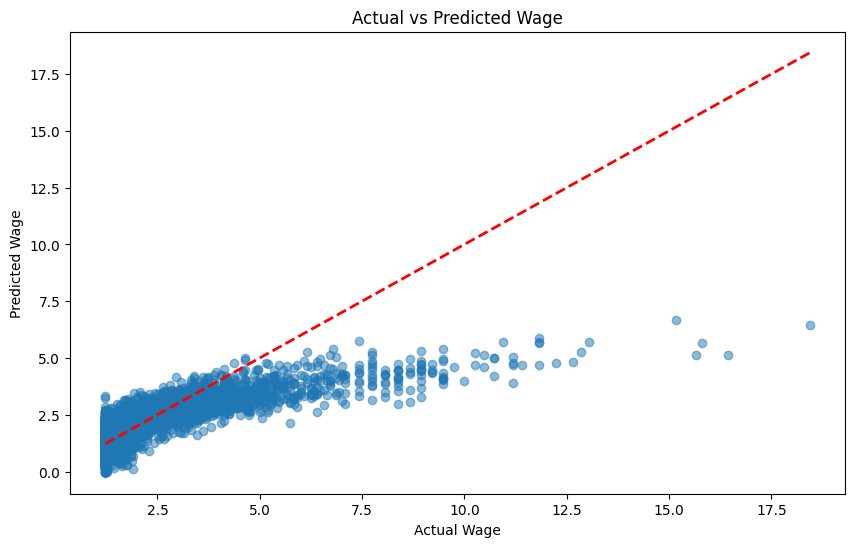

SVR - Mean Squared Error: 1.3396011246552306
SVR - R² Score: 0.5541062516645221

Top 20 Features:
              Feature  Importance
0       overall_score    0.212168
1           Reactions    0.049048
2             Heading    0.047144
3          Short Pass    0.046004
4      position_score    0.041947
5           Composure    0.020148
6         Heading_new    0.017265
7           Dribbling    0.014220
8       Interceptions    0.013681
9          mental_avg    0.013619
10       Acceleration    0.012775
11        passing_avg    0.012662
12       Slide Tackle    0.012249
13           pref_pos    0.012099
14     Short Pass_new    0.011592
15       Stand Tackle    0.010624
16  Att. Position_new    0.010527
17       Sprint Speed    0.010159
18     ball_skill_avg    0.009710
19           Crossing    0.008987


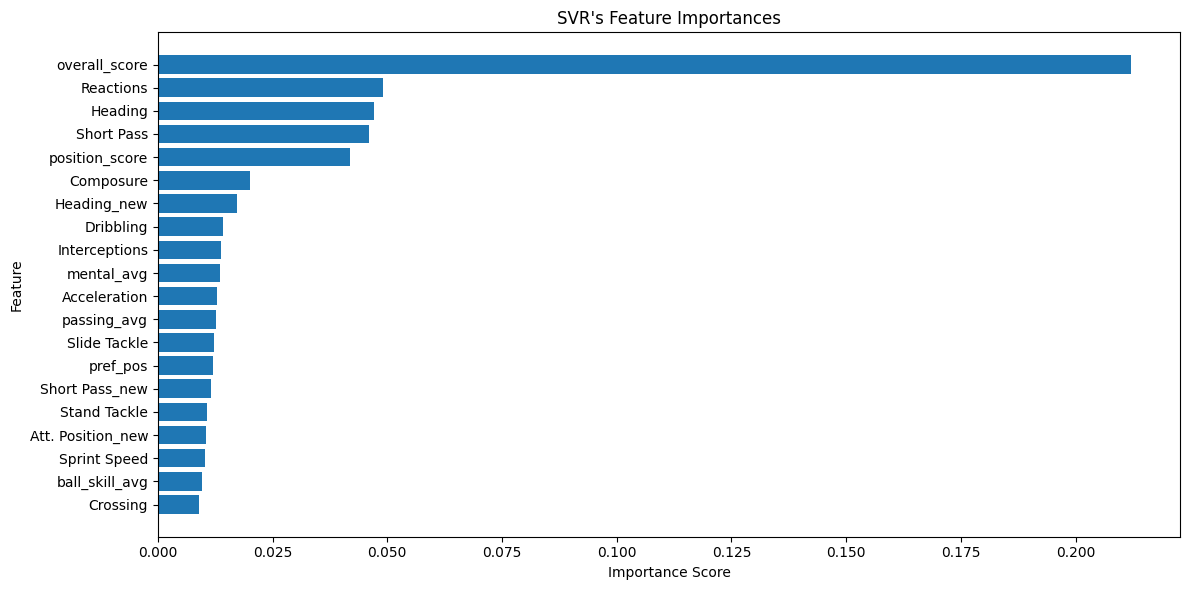

In [ ]:
# Train the SVR model
svr_model = SVR(kernel='rbf', C=100, epsilon=0.1)
svr_model.fit(X_train_sqrt, y_train_sqrt)

# Predict on test data
svr_y_pred = svr_model.predict(X_test_sqrt)

# Visualization: Actual vs. Predicted Wage
plt.figure(figsize=(10, 6))
plt.scatter(y_test_sqrt, svr_y_pred, alpha=0.5)
plt.plot([y_test_sqrt.min(), y_test_sqrt.max()], [y_test_sqrt.min(), y_test_sqrt.max()], 'r--', lw=2)
plt.title("Actual vs Predicted Wage")
plt.xlabel("Actual Wage")
plt.ylabel("Predicted Wage")
plt.show()

# Calculate metrics
svr_mse = mean_squared_error(y_test_sqrt, svr_y_pred)
svr_r2 = r2_score(y_test_sqrt, svr_y_pred)

# Print performance metrics
print(f"SVR - Mean Squared Error: {svr_mse}")
print(f"SVR - R² Score: {svr_r2}")

# Visualize feature importance for the SVR model
result = permutation_importance(svr_model, X_test_sqrt, y_test_sqrt, n_repeats=1, random_state=42)
feature_list = list(zip(X_test_sqrt.columns, result["importances_mean"]))
top_20_features = pd.DataFrame(sorted(feature_list, key=lambda x: x[1], reverse=True)[:20], columns=["Feature", "Importance"])

print("\nTop 20 Features:")
print(top_20_features)

# Plot feature importance
plt.figure(figsize=(12, 6))
plt.barh(top_20_features["Feature"], top_20_features["Importance"])
plt.title("SVR's Feature Importances")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Model 5: SVR on features (inverse_transfrom(sqrt y_pred) vs. y_test)

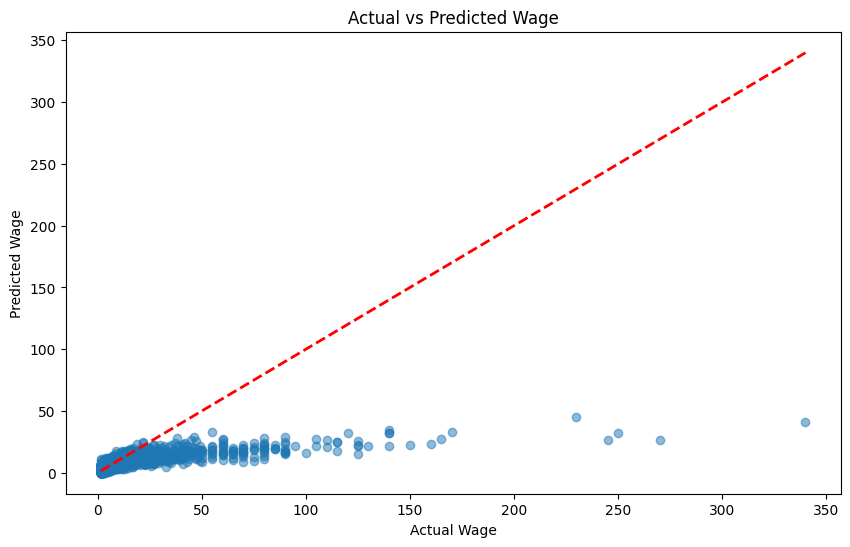

SVR - Mean Squared Error: 233.89944178824558
SVR - R² Score: 0.3001036866964809

Top 20 Features:
              Feature  Importance
0       overall_score    0.024381
1           Reactions    0.008034
2      position_score    0.006541
3          Short Pass    0.006406
4             Heading    0.005254
5           Composure    0.003650
6          mental_avg    0.002643
7         Heading_new    0.002498
8           Dribbling    0.002443
9         passing_avg    0.002376
10      Interceptions    0.002170
11           pref_pos    0.001930
12  Att. Position_new    0.001906
13     ball_skill_avg    0.001825
14       Stand Tackle    0.001778
15       Slide Tackle    0.001736
16           Crossing    0.001715
17       Acceleration    0.001650
18             Vision    0.001601
19       Sprint Speed    0.001444


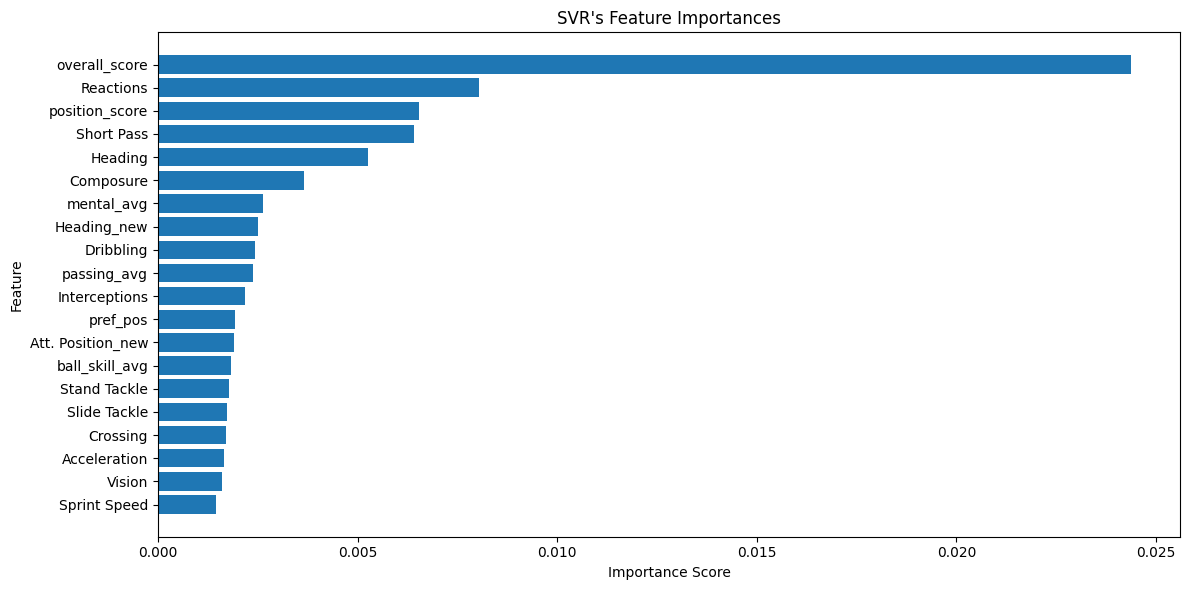

In [ ]:
# Train the SVR model
svr_model = SVR(kernel='rbf', C=100, epsilon=0.1)
svr_model.fit(X_train_sqrt, y_train_sqrt)

# Predict on test data
svr_y_pred = svr_model.predict(X_test_sqrt)

class SqrtTransformer():
    def __init__(self, power=1/2):
        self.power = power

    def fit(self, X):
        return self

    def transform(self, X):
        return X ** self.power

    def fit_transform(self, X):
        return self.fit(X).transform(X)

    def inverse_transform(self, X):
        return np.power(X, 1/self.power)

y_tf = SqrtTransformer()
svr_y_pred = y_tf.inverse_transform(svr_y_pred.reshape(-1, 1))

# Visualization: Actual vs. Predicted Wage
plt.figure(figsize=(10, 6))
plt.scatter(y_test, svr_y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title("Actual vs Predicted Wage")
plt.xlabel("Actual Wage")
plt.ylabel("Predicted Wage")
plt.show()

# Calculate metrics
svr_mse = mean_squared_error(y_test, svr_y_pred)
svr_r2 = r2_score(y_test, svr_y_pred)

# Print performance metrics
print(f"SVR - Mean Squared Error: {svr_mse}")
print(f"SVR - R² Score: {svr_r2}")

# Visualize feature importance for the SVR model
result = permutation_importance(svr_model, X_test_sqrt, y_test, n_repeats=1, random_state=42)
feature_list = list(zip(X_test_sqrt.columns, result["importances_mean"]))
top_20_features = pd.DataFrame(sorted(feature_list, key=lambda x: x[1], reverse=True)[:20], columns=["Feature", "Importance"])

print("\nTop 20 Features:")
print(top_20_features)

# Plot feature importance
plt.figure(figsize=(12, 6))
plt.barh(top_20_features["Feature"], top_20_features["Importance"])
plt.title("SVR's Feature Importances")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Model 6: SVR on XGBoost's top 20 features (sqrt y_pred vs. sqrt y_test)

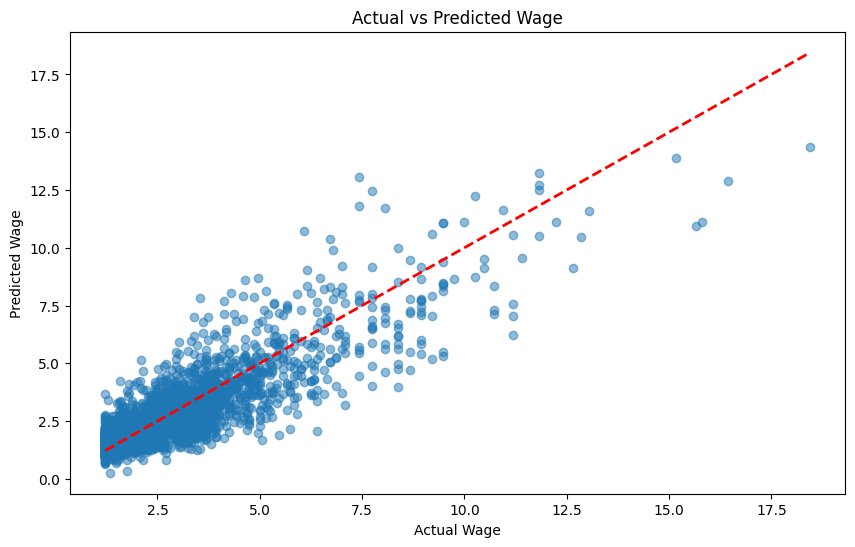

SVR on XGBoost's Top 20 Features - Mean Squared Error: 0.6898372800096655
SVR on XGBoost's Top 20 Features - R² Score: 0.7703837919632793

Top 20 Features:
          Feature  Importance
0   Att. Position    0.241982
1    Slide Tackle    0.238320
2    Ball Control    0.189484
3       Dribbling    0.180179
4    Stand Tackle    0.172393
5      Short Pass    0.169294
6         Jumping    0.142078
7      Aggression    0.109641
8       Reactions    0.099514
9   Interceptions    0.092018
10       Crossing    0.087633
11   Acceleration    0.080943
12        Agility    0.079318
13         Vision    0.064857
14        Stamina    0.054609
15      Long Pass    0.051870
16   Sprint Speed    0.046754
17       Strength    0.038634
18      Composure    0.035398
19        Balance    0.034515


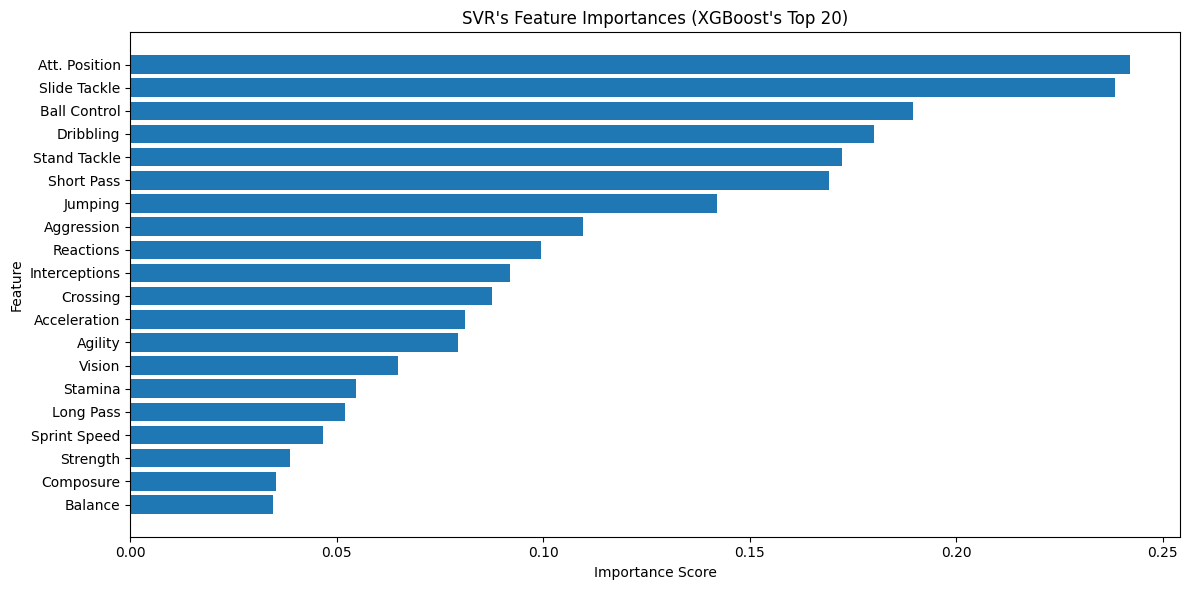

In [ ]:
# Subset data for XGBoost's top 20 features
XGBoost_features = ['Ball Control', 'Dribbling', 'Slide Tackle', 'Stand Tackle', 'Aggression',
                 'Reactions', 'Att. Position', 'Interceptions', 'Vision', 'Composure',
                 'Crossing', 'Short Pass', 'Long Pass', 'Acceleration', 'Stamina',
                 'Strength', 'Balance', 'Sprint Speed', 'Agility', 'Jumping']

X_XGBoost_train = X_train_sqrt[XGBoost_features]
X_XGBoost_test = X_test_sqrt[XGBoost_features]

# Train the SVR model
svr_XGBoost_model = SVR(kernel='rbf', C=100, epsilon=0.1)
svr_XGBoost_model.fit(X_XGBoost_train, y_train_sqrt)

# Predict on test data
svr_XGBoost_y_pred = svr_XGBoost_model.predict(X_XGBoost_test)

# Visualization: Actual vs. Predicted Wage
plt.figure(figsize=(10, 6))
plt.scatter(y_test_sqrt, svr_XGBoost_y_pred, alpha=0.5)
plt.plot([y_test_sqrt.min(), y_test_sqrt.max()], [y_test_sqrt.min(), y_test_sqrt.max()], 'r--', lw=2)
plt.title("Actual vs Predicted Wage")
plt.xlabel("Actual Wage")
plt.ylabel("Predicted Wage")
plt.show()

# Calculate metrics
svr_XGBoost_mse = mean_squared_error(y_test_sqrt, svr_XGBoost_y_pred)
svr_XGBoost_r2 = r2_score(y_test_sqrt, svr_XGBoost_y_pred)

# Print performance metrics
print(f"SVR on XGBoost's Top 20 Features - Mean Squared Error: {svr_XGBoost_mse}")
print(f"SVR on XGBoost's Top 20 Features - R² Score: {svr_XGBoost_r2}")

# Visualize feature importance for XGBoost's top 20 features
result = permutation_importance(svr_XGBoost_model, X_XGBoost_test, y_test_sqrt, n_repeats=1, random_state=42)
feature_list = list(zip(X_XGBoost_test.columns, result["importances_mean"]))
top_20_features = pd.DataFrame(sorted(feature_list, key=lambda x: x[1], reverse=True)[:20], columns=["Feature", "Importance"])

print("\nTop 20 Features:")
print(top_20_features)

# Plot feature importance
plt.figure(figsize=(12, 6))
plt.barh(top_20_features["Feature"], top_20_features["Importance"])
plt.title("SVR's Feature Importances (XGBoost's Top 20)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Model 7: SVR on XGBoost's top 20 features (inverse_transform(sqrt y_pred) vs. y_test)

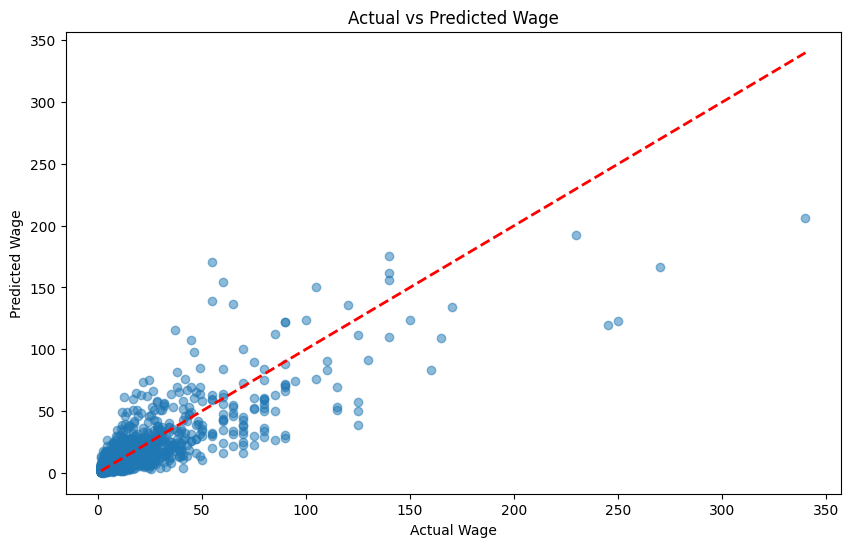

SVR on XGBoost's Top 20 Features - Mean Squared Error: 93.76993240617149
SVR on XGBoost's Top 20 Features - R² Score: 0.7194126266910238

Top 20 Features:
          Feature  Importance
0    Ball Control    0.047944
1    Slide Tackle    0.044167
2       Dribbling    0.040796
3   Att. Position    0.038506
4      Short Pass    0.033812
5       Reactions    0.033540
6    Stand Tackle    0.031717
7      Aggression    0.027896
8   Interceptions    0.026719
9        Crossing    0.022181
10         Vision    0.021904
11      Composure    0.019284
12        Jumping    0.017904
13        Agility    0.015145
14   Acceleration    0.012645
15      Long Pass    0.011346
16        Balance    0.009880
17        Stamina    0.008087
18       Strength    0.005886
19   Sprint Speed    0.003481


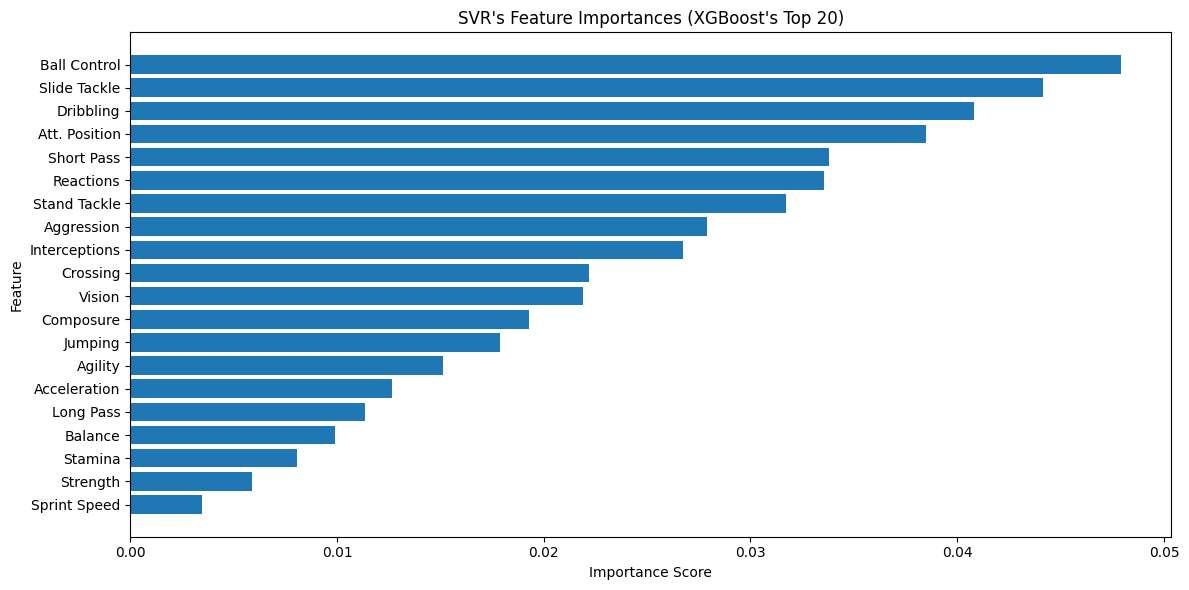

In [ ]:
# Subset data for XGBoost's top 20 features
XGBoost_features = ['Ball Control', 'Dribbling', 'Slide Tackle', 'Stand Tackle', 'Aggression',
                 'Reactions', 'Att. Position', 'Interceptions', 'Vision', 'Composure',
                 'Crossing', 'Short Pass', 'Long Pass', 'Acceleration', 'Stamina',
                 'Strength', 'Balance', 'Sprint Speed', 'Agility', 'Jumping']

X_XGBoost_train = X_train_sqrt[XGBoost_features]
X_XGBoost_test = X_test_sqrt[XGBoost_features]

# Train the SVR model
svr_XGBoost_model = SVR(kernel='rbf', C=100, epsilon=0.1)
svr_XGBoost_model.fit(X_XGBoost_train, y_train_sqrt)

# Predict on test data
svr_XGBoost_y_pred = svr_XGBoost_model.predict(X_XGBoost_test)

class SqrtTransformer():
    def __init__(self, power=1/2):
        self.power = power

    def fit(self, X):
        return self

    def transform(self, X):
        return X ** self.power

    def fit_transform(self, X):
        return self.fit(X).transform(X)

    def inverse_transform(self, X):
        return np.power(X, 1/self.power)

y_tf = SqrtTransformer()
svr_XGBoost_y_pred = y_tf.inverse_transform(svr_XGBoost_y_pred.reshape(-1, 1))

# Visualization: Actual vs. Predicted Wage
plt.figure(figsize=(10, 6))
plt.scatter(y_test, svr_XGBoost_y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title("Actual vs Predicted Wage")
plt.xlabel("Actual Wage")
plt.ylabel("Predicted Wage")
plt.show()

# Calculate metrics
svr_XGBoost_mse = mean_squared_error(y_test, svr_XGBoost_y_pred)
svr_XGBoost_r2 = r2_score(y_test, svr_XGBoost_y_pred)

# Print performance metrics
print(f"SVR on XGBoost's Top 20 Features - Mean Squared Error: {svr_XGBoost_mse}")
print(f"SVR on XGBoost's Top 20 Features - R² Score: {svr_XGBoost_r2}")

# Visualize feature importance for XGBoost's top 20 features
result = permutation_importance(svr_XGBoost_model, X_XGBoost_test, y_test, n_repeats=1, random_state=42)
feature_list = list(zip(X_XGBoost_test.columns, result["importances_mean"]))
top_20_features = pd.DataFrame(sorted(feature_list, key=lambda x: x[1], reverse=True)[:20], columns=["Feature", "Importance"])

print("\nTop 20 Features:")
print(top_20_features)

# Plot feature importance
plt.figure(figsize=(12, 6))
plt.barh(top_20_features["Feature"], top_20_features["Importance"])
plt.title("SVR's Feature Importances (XGBoost's Top 20)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Model 8: SVR on Preprocessed's top 20 features (sqrt y_pred vs. sqrt y_test)

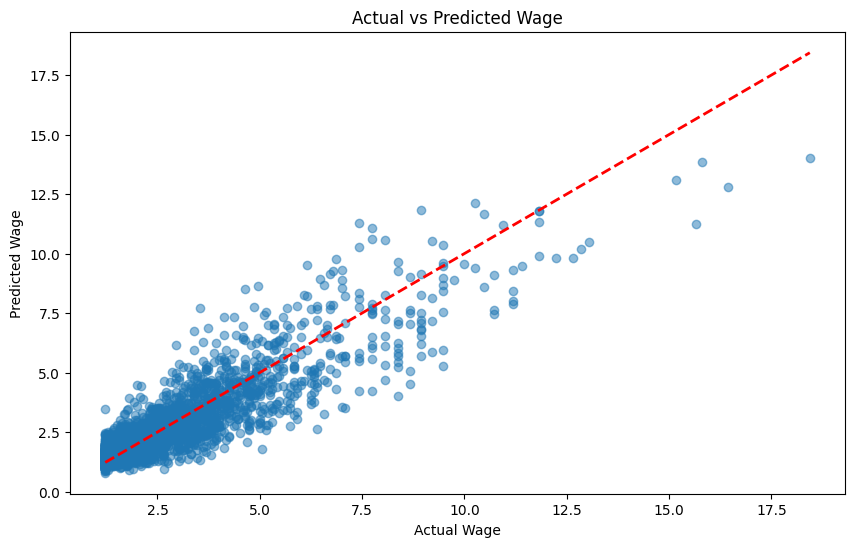

SVR on Preprocessed's Top 20 Features - Mean Squared Error: 0.5528495040621082
SVR on Preprocessed's Top 20 Features - R² Score: 0.8159809415693738

Top 20 Features:
          Feature  Importance
0   overall_score    1.084710
1       Dribbling    0.052346
2    Ball Control    0.042550
3      Short Pass    0.032111
4    Stand Tackle    0.027387
5    Slide Tackle    0.027116
6   Att. Position    0.025939
7        Crossing    0.023825
8   Interceptions    0.018770
9         Jumping    0.016184
10     Aggression    0.015807
11      Reactions    0.015043
12        Balance    0.014229
13            age    0.013731
14        Stamina    0.012400
15         height    0.011870
16   Sprint Speed    0.011498
17   Acceleration    0.009933
18      Composure    0.008021
19      Long Pass    0.007930


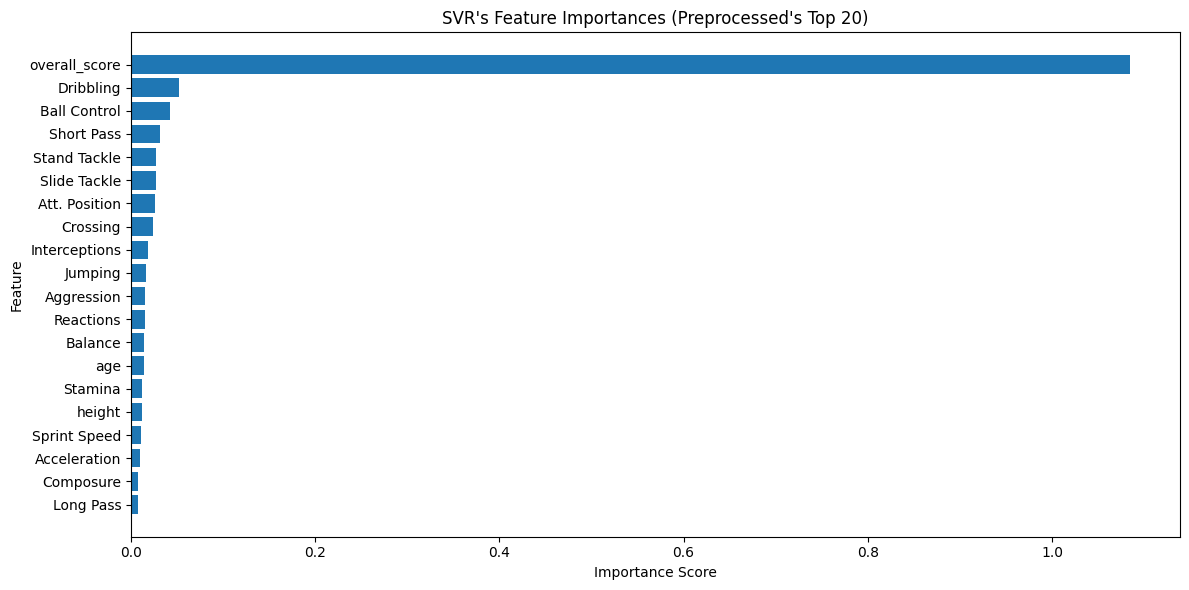

In [ ]:
# Subset data for Preprocessed's top 20 features
Preprocessed_features = [
    'overall_score', 'position_score', 'height', 'weight', 'age', 'Ball Control',
    'Dribbling', 'Slide Tackle', 'Stand Tackle', 'Aggression', 'Reactions',
    'Att. Position', 'Interceptions', 'Vision', 'Composure', 'Crossing',
    'Short Pass', 'Long Pass', 'Acceleration', 'Stamina', 'Strength', 'Balance',
    'Sprint Speed', 'Agility', 'Jumping'
]

X_Preprocessed_train = X_train_sqrt[Preprocessed_features]
X_Preprocessed_test = X_test_sqrt[Preprocessed_features]

# Train the SVR model
svr_Preprocessed_model = SVR(kernel='rbf', C=100, epsilon=0.1)
svr_Preprocessed_model.fit(X_Preprocessed_train, y_train_sqrt)

# Predict on test data
svr_Preprocessed_y_pred = svr_Preprocessed_model.predict(X_Preprocessed_test)

# Calculate metrics
svr_Preprocessed_mse = mean_squared_error(y_test_sqrt, svr_Preprocessed_y_pred)
svr_Preprocessed_r2 = r2_score(y_test_sqrt, svr_Preprocessed_y_pred)

# Visualization: Actual vs. Predicted Wage
plt.figure(figsize=(10, 6))
plt.scatter(y_test_sqrt, svr_Preprocessed_y_pred, alpha=0.5)
plt.plot([y_test_sqrt.min(), y_test_sqrt.max()], [y_test_sqrt.min(), y_test_sqrt.max()], 'r--', lw=2)
plt.title("Actual vs Predicted Wage")
plt.xlabel("Actual Wage")
plt.ylabel("Predicted Wage")
plt.show()

# Print performance metrics
print(f"SVR on Preprocessed's Top 20 Features - Mean Squared Error: {svr_Preprocessed_mse}")
print(f"SVR on Preprocessed's Top 20 Features - R² Score: {svr_Preprocessed_r2}")

# Visualize feature importance for Preprocessed's top 20 features
result = permutation_importance(svr_Preprocessed_model, X_Preprocessed_test, y_test_sqrt, n_repeats=1, random_state=42)
feature_list = list(zip(X_Preprocessed_test.columns, result["importances_mean"]))
top_20_features = pd.DataFrame(sorted(feature_list, key=lambda x: x[1], reverse=True)[:20], columns=["Feature", "Importance"])

print("\nTop 20 Features:")
print(top_20_features)

# Plot feature importance
plt.figure(figsize=(12, 6))
plt.barh(top_20_features["Feature"], top_20_features["Importance"])
plt.title("SVR's Feature Importances (Preprocessed's Top 20)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Model 9: SVR on Preprocessed's top 20 features (inverse_transform(sqrt y_pred) vs. y_test)

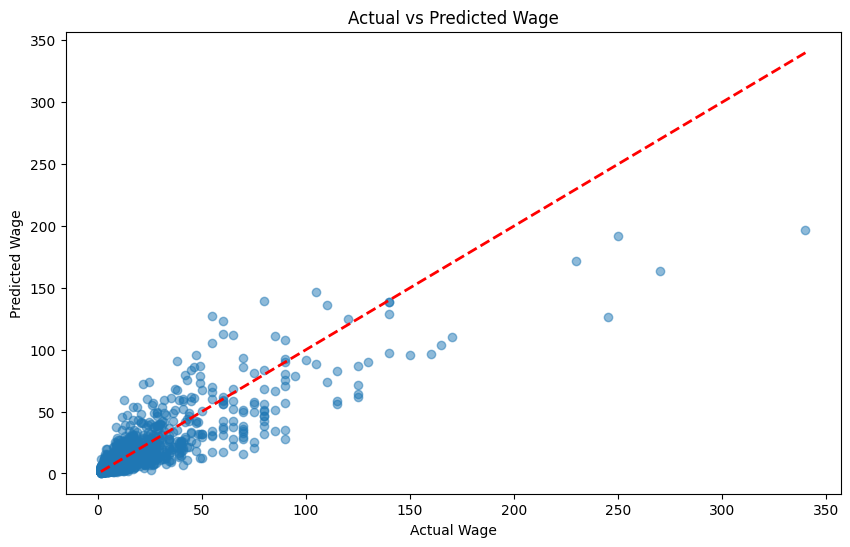

SVR on Preprocessed's Top 20 Features - Mean Squared Error: 77.07174213688536
SVR on Preprocessed's Top 20 Features - R² Score: 0.7693785510171475

Top 20 Features:
           Feature  Importance
0    overall_score    0.131778
1        Dribbling    0.025709
2       Short Pass    0.019512
3     Ball Control    0.018121
4         Crossing    0.014566
5        Reactions    0.014449
6     Stand Tackle    0.012434
7     Slide Tackle    0.011930
8        Composure    0.010071
9    Interceptions    0.010059
10      Aggression    0.009987
11   Att. Position    0.008939
12         Balance    0.006732
13         Jumping    0.006108
14         Agility    0.003294
15    Sprint Speed    0.002318
16          height    0.000657
17  position_score   -0.000185
18          weight   -0.000488
19          Vision   -0.000937


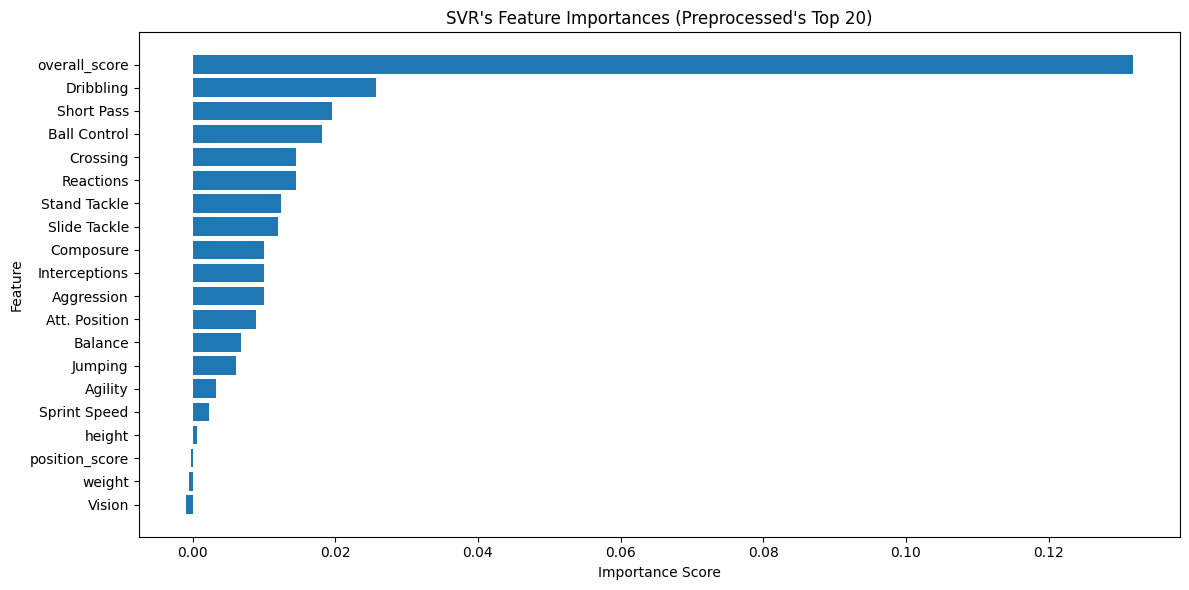

In [ ]:
# Subset data for Preprocessed's top 20 features
Preprocessed_features = [
    'overall_score', 'position_score', 'height', 'weight', 'age', 'Ball Control',
    'Dribbling', 'Slide Tackle', 'Stand Tackle', 'Aggression', 'Reactions',
    'Att. Position', 'Interceptions', 'Vision', 'Composure', 'Crossing',
    'Short Pass', 'Long Pass', 'Acceleration', 'Stamina', 'Strength', 'Balance',
    'Sprint Speed', 'Agility', 'Jumping'
]

X_Preprocessed_train = X_train_sqrt[Preprocessed_features]
X_Preprocessed_test = X_test_sqrt[Preprocessed_features]

# Train the SVR model
svr_Preprocessed_model = SVR(kernel='rbf', C=100, epsilon=0.1)
svr_Preprocessed_model.fit(X_Preprocessed_train, y_train_sqrt)

# Predict on test data
svr_Preprocessed_y_pred = svr_Preprocessed_model.predict(X_Preprocessed_test)

class SqrtTransformer():
    def __init__(self, power=1/2):
        self.power = power

    def fit(self, X):
        return self

    def transform(self, X):
        return X ** self.power

    def fit_transform(self, X):
        return self.fit(X).transform(X)

    def inverse_transform(self, X):
        return np.power(X, 1/self.power)

y_tf = SqrtTransformer()
svr_Preprocessed_y_pred = y_tf.inverse_transform(svr_Preprocessed_y_pred.reshape(-1, 1))

# Calculate metrics
svr_Preprocessed_mse = mean_squared_error(y_test, svr_Preprocessed_y_pred)
svr_Preprocessed_r2 = r2_score(y_test, svr_Preprocessed_y_pred)

# Visualization: Actual vs. Predicted Wage
plt.figure(figsize=(10, 6))
plt.scatter(y_test, svr_Preprocessed_y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title("Actual vs Predicted Wage")
plt.xlabel("Actual Wage")
plt.ylabel("Predicted Wage")
plt.show()

# Print performance metrics
print(f"SVR on Preprocessed's Top 20 Features - Mean Squared Error: {svr_Preprocessed_mse}")
print(f"SVR on Preprocessed's Top 20 Features - R² Score: {svr_Preprocessed_r2}")

# Visualize feature importance for Preprocessed's top 20 features
result = permutation_importance(svr_Preprocessed_model, X_Preprocessed_test, y_test, n_repeats=1, random_state=42)
feature_list = list(zip(X_Preprocessed_test.columns, result["importances_mean"]))
top_20_features = pd.DataFrame(sorted(feature_list, key=lambda x: x[1], reverse=True)[:20], columns=["Feature", "Importance"])

print("\nTop 20 Features:")
print(top_20_features)

# Plot feature importance
plt.figure(figsize=(12, 6))
plt.barh(top_20_features["Feature"], top_20_features["Importance"])
plt.title("SVR's Feature Importances (Preprocessed's Top 20)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()